<a href="https://colab.research.google.com/github/jpablocrdn/Estud-IA/blob/master/%C3%81rboles_de_decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Técnicas de Inteligencia Artificial

## Actividad 3:
**Laboratorio:**  Áboles de decisión, reglas y Ensamble Learning

Presentado por: Juan Pablo Pulgarin

**Base de datos:** [Dataset](https://drive.google.com/file/d/1pPw1n5xPighRgeJ1srU9ra0A8IX4ewSi/view?usp=sharing)

**Informe de resultados:** [Informe](https://drive.google.com/file/d/1h9AxXtXUeJBdNR3Z_66o6UeteNij57mW/view?usp=sharing)

In [ ]:
# instalar las librerias necesarias
!pip install scikit-learn numpy pandas matplotlib seaborn google.colab gdown scikit-learn


In [ ]:
# Importar las librerias de trabajo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from pandas import read_csv

In [ ]:
#Cargar el Dataset
#https://drive.google.com/file/d/1pPw1n5xPighRgeJ1srU9ra0A8IX4ewSi/view?usp=sharing

file_id = "1pPw1n5xPighRgeJ1srU9ra0A8IX4ewSi"
url = f"https://drive.google.com/uc?id={file_id}"

dataset = pd.read_csv(url, delimiter=",")

# Imprimir head
dataset.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


# Explicar el problema a trabajar.
- **Descripción del Problema:** El conjunto de datos sobre rendimiento estudiantil busca analizar factores que influyen en el desempeño académico de estudiantes, con el objetivo de identificar patrones o predicciones útiles para mejorar estrategias educativas.

- **Tipo de problema:** Clasificación supervisada.
El problema se formula como una tarea de clasificación supervisada, donde el objetivo es predecir el rendimiento académico (alto, medio, bajo) de los estudiantes en base a variables socioeconómicas y demográficas.

- **Variable Objetivo:** GradeClass, Clasificación de las calificaciones de los estudiantes según el GPA:
  0.  (GPA >= 3.5)
  1.  (3.0 <= GPA < 3.5)
  2.  (2,5 <= GPA < 3,0)
  3.  (2.0 <= GPA < 2.5)
  4.  (GPA < 2.0)

- **Varaibles de entrada:**
  - Age
  - Gender
  - Ethnicity
  - ParentalEducation
  - StudyTimeWeekly
  - Absences
  - ParentalSupport
  - Extracurricular
  - Sports
  - Music
  - Extracurricular        
  - Volunteering
  - GPA


- **Utilidad y posible solución:** La utilidad del problema radica en mejorar el rendimiento académico estudiantil mediante la identificación de factores clave como el tiempo de estudio, el apoyo parental y las ausencias, permitiendo a las instituciones diseñar estrategias educativas más efectivas y personalizadas. Un modelo de clasificación supervisada, como Árbol de Decisión o Random Forest, puede predecir el desempeño académico (`GradeClass`), ayudando a identificar estudiantes en riesgo de bajo rendimiento para implementar intervenciones específicas, como tutorías o programas extracurriculares. Esto optimiza los recursos, fomenta políticas inclusivas y mejora el nivel educativo general, beneficiando tanto a los estudiantes como a las instituciones y la sociedad.


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [ ]:
dataset.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [ ]:
print(dataset["GradeClass"].value_counts())

GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64


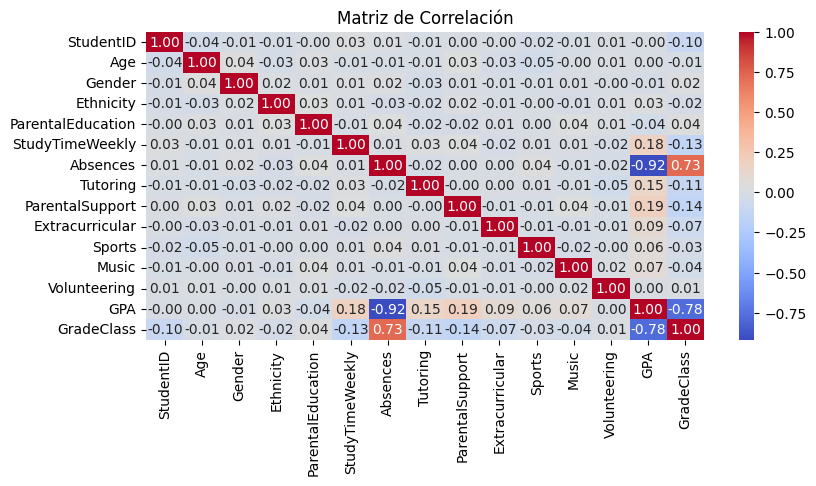

Correlaciones con 'GradeClass':
 GradeClass           1.000000
GPA                  0.782835
Absences             0.728633
ParentalSupport      0.136823
StudyTimeWeekly      0.134131
Tutoring             0.111695
StudentID            0.098500
Extracurricular      0.069733
ParentalEducation    0.041031
Music                0.036065
Sports               0.026654
Ethnicity            0.023326
Gender               0.022998
Volunteering         0.013156
Age                  0.006250
Name: GradeClass, dtype: float64


In [ ]:
# Calcular la matriz de correlación
correlation_matrix = dataset.corr()

# Graficar la matriz de correlación para visualizar relaciones entre variables
plt.figure(figsize=(9, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación")
plt.show()

# Mostrar las correlaciones absolutas con respecto a la variable objetivo 'GradeClass', ordenadas
correlation_with_target = correlation_matrix['GradeClass'].abs().sort_values(ascending=False)
print("Correlaciones con 'GradeClass':\n", correlation_with_target)


In [ ]:
# Identificar las columnas para eliminar
columns_to_drop = ['StudentID', 'Age', 'Gender', 'Volunteering', 'Ethnicity']


# Eliminar las columnas seleccionadas
cleaned_dataset = dataset.drop(columns=columns_to_drop)

# Revisar el nuevo conjunto de datos
print(cleaned_dataset.info())
print(cleaned_dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ParentalEducation  2392 non-null   int64  
 1   StudyTimeWeekly    2392 non-null   float64
 2   Absences           2392 non-null   int64  
 3   Tutoring           2392 non-null   int64  
 4   ParentalSupport    2392 non-null   int64  
 5   Extracurricular    2392 non-null   int64  
 6   Sports             2392 non-null   int64  
 7   Music              2392 non-null   int64  
 8   GPA                2392 non-null   float64
 9   GradeClass         2392 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 187.0 KB
None
   ParentalEducation  StudyTimeWeekly  Absences  Tutoring  ParentalSupport  \
0                  2        19.833723         7         1                2   
1                  1        15.408756         0         0                1   
2                  3      

In [ ]:
array=cleaned_dataset.values
X=array[:,0:6]
Y=array[:,6]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, shuffle=True)
print(cleaned_dataset)

      ParentalEducation  StudyTimeWeekly  Absences  Tutoring  ParentalSupport  \
0                     2        19.833723         7         1                2   
1                     1        15.408756         0         0                1   
2                     3         4.210570        26         0                2   
3                     3        10.028829        14         0                3   
4                     2         4.672495        17         1                3   
...                 ...              ...       ...       ...              ...   
2387                  3        10.680555         2         0                4   
2388                  1         7.583217         4         1                4   
2389                  2         6.805500        20         0                2   
2390                  0        12.416653        17         0                2   
2391                  2        17.819907        13         0                2   

      Extracurricular  Spor

In [ ]:
# Separar las características (X) y la variable objetivo (Y) tras la limpieza
X = cleaned_dataset.drop('GradeClass', axis=1)
Y = cleaned_dataset['GradeClass']

# Mostrar las primeras filas del dataset limpio
print("Filas del dataset limpio:")
print(cleaned_dataset.head())


Filas del dataset limpio:
   ParentalEducation  StudyTimeWeekly  Absences  Tutoring  ParentalSupport  \
0                  2        19.833723         7         1                2   
1                  1        15.408756         0         0                1   
2                  3         4.210570        26         0                2   
3                  3        10.028829        14         0                3   
4                  2         4.672495        17         1                3   

   Extracurricular  Sports  Music       GPA  GradeClass  
0                0       0      1  2.929196         2.0  
1                0       0      0  3.042915         1.0  
2                0       0      0  0.112602         4.0  
3                1       0      0  2.054218         3.0  
4                0       0      0  1.288061         4.0  


In [ ]:
# Codigo de ajuste para el Modelo de Clasificación 1
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
# 1. Ajuste del Árbol de Decisión con Hiperparámetros Básicos
decision_tree = DecisionTreeClassifier(
    max_depth=10,
    min_samples_leaf=5,
    criterion='entropy',
    random_state=42,
    class_weight='balanced'
)
decision_tree.fit(X_train, y_train)

# Evaluar el Árbol de Decisión ajustado
dt_accuracy = decision_tree.score(X_test, y_test)
dt_cv_scores = cross_val_score(decision_tree, X, Y, cv=5)

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Cross-Validation Scores:", dt_cv_scores)

Decision Tree Accuracy: 0.824634655532359
Decision Tree Cross-Validation Scores: [0.91858038 0.87891441 0.89958159 0.90167364 0.65271967]


In [ ]:
# 2. GridSearchCV para Ajustar los Hiperparámetros del Árbol de Decisión
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_dt_model = grid_search.best_estimator_
best_dt_accuracy = best_dt_model.score(X_test, y_test)
best_dt_cv_scores = cross_val_score(best_dt_model, X, Y, cv=5)

print("Exactitud del Mejor Árbol de Decisión:", best_dt_accuracy)
print("Cross-Validation Scores del Mejor Árbol de Decisión:", best_dt_cv_scores)
print("Mejores Parámetros del Mejor Árbol de Decisión:", grid_search.best_params_)

Exactitud del Mejor Árbol de Decisión: 0.8997912317327766
Cross-Validation Scores del Mejor Árbol de Decisión: [0.98329854 0.93736952 0.97698745 0.96025105 0.68200837]
Mejores Parámetros del Mejor Árbol de Decisión: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
# 3. Random Forest
random_forest = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=5,
    random_state=42,
    class_weight='balanced'
)
random_forest.fit(X_train, y_train)

# Evaluar el Random Forest
rf_accuracy = random_forest.score(X_test, y_test)
rf_cv_scores = cross_val_score(random_forest, X, Y, cv=5)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Cross-Validation Scores:", rf_cv_scores)


Random Forest Accuracy: 0.9227557411273486
Random Forest Cross-Validation Scores: [0.99791232 1.         1.         0.96443515 0.68200837]


In [ ]:
# Comparación de modelos
from sklearn.metrics import precision_score, recall_score, f1_score

# Función para calcular métricas de un modelo
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return {"Modelo": model_name, "Exactitud": accuracy, "Precisión": precision, "Recall": recall, "F1-Score": f1}

# Evaluar los modelos ajustados
results = []
results.append(evaluate_model(decision_tree, X_test, y_test, "Árbol de Decisión (Inicial)"))
results.append(evaluate_model(best_dt_model, X_test, y_test, "Árbol de Decisión (GridSearchCV)"))
results.append(evaluate_model(random_forest, X_test, y_test, "Random Forest"))

# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results)

# Mostrar los resultados en formato tabular
print(results_df)


                             Modelo  Exactitud  Precisión    Recall  F1-Score
0       Árbol de Decisión (Inicial)   0.824635   0.859562  0.824635  0.835749
1  Árbol de Decisión (GridSearchCV)   0.899791   0.905183  0.899791  0.901602
2                     Random Forest   0.922756   0.921906  0.922756  0.920960


In [ ]:
# Función para calcular instancias clasificadas correctamente e incorrectamente
def classification_summary(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Correctas": (y_pred == y_test).sum(),
        "Incorrectas": (y_pred != y_test).sum(),
        "Total": len(y_test)
    }

# Calcular resultados para ambos modelos
results = pd.DataFrame([
    {"Modelo": "Árbol de Decisión (Mejorado)", **classification_summary(best_dt_model, X_test, y_test)},
    {"Modelo": "Random Forest", **classification_summary(random_forest, X_test, y_test)}
])

# Mostrar resultados
results


,Modelo,Correctas,Incorrectas,Total
0,Árbol de Decisión (Mejorado),431,48,479
1,Random Forest,442,37,479


In [ ]:
# Función para calcular TP Rate y FP Rate
def calculate_tp_fp_rate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Calcular TP Rate (Sensibilidad)
    tpr = cm.diagonal() / cm.sum(axis=1)  # Verdaderos positivos / Total de la clase real

    # Calcular FP Rate
    fp = cm.sum(axis=0) - cm.diagonal()  # Falsos positivos
    tn_fp = cm.sum() - cm.sum(axis=1)    # Total negativos + falsos positivos
    fpr = fp / tn_fp                     # Falsos positivos / Total negativos

    # Obtener clases del conjunto de prueba
    classes = sorted(y_test.unique())

    return pd.DataFrame({
        "Clase": classes,
        "TP Rate": tpr,
        "FP Rate": fpr
    })

# Árbol de Decisión (Mejorado)
dt_rates = calculate_tp_fp_rate(best_dt_model, X_test, y_test).assign(Modelo="Árbol de Decisión (Mejorado)")
print("\n=== TP y FP Rates - Árbol de Decisión (Mejorado) ===")
print(dt_rates)

# Random Forest
rf_rates = calculate_tp_fp_rate(random_forest, X_test, y_test).assign(Modelo="Random Forest")
print("\n=== TP y FP Rates - Random Forest ===")
#rf_rates



=== TP y FP Rates - Árbol de Decisión (Mejorado) ===
   Clase   TP Rate   FP Rate                        Modelo
0    0.0  0.636364  0.030635  Árbol de Decisión (Mejorado)
1    1.0  0.877551  0.013953  Árbol de Decisión (Mejorado)
2    2.0  0.835294  0.012690  Árbol de Decisión (Mejorado)
3    3.0  0.895349  0.022901  Árbol de Decisión (Mejorado)
4    4.0  0.953586  0.057851  Árbol de Decisión (Mejorado)

=== TP y FP Rates - Random Forest ===


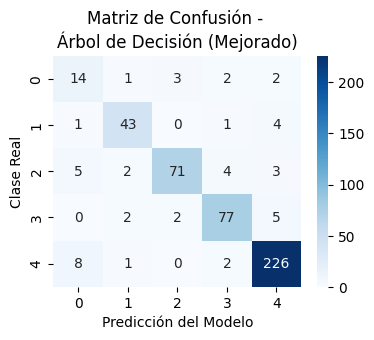

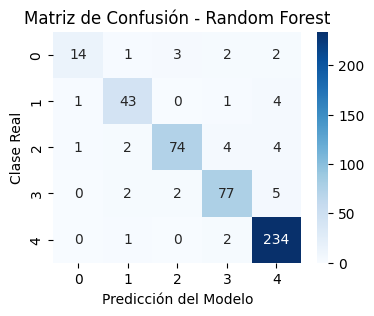

In [ ]:
# Matriz de confusión
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusión - {model_name}")
    plt.ylabel("Clase Real")
    plt.xlabel("Predicción del Modelo")
    plt.show()

# Árbol de Decisión
plot_confusion_matrix(best_dt_model, X_test, y_test, "\nÁrbol de Decisión (Mejorado)")

# Random Forest
plot_confusion_matrix(random_forest, X_test, y_test, "Random Forest")


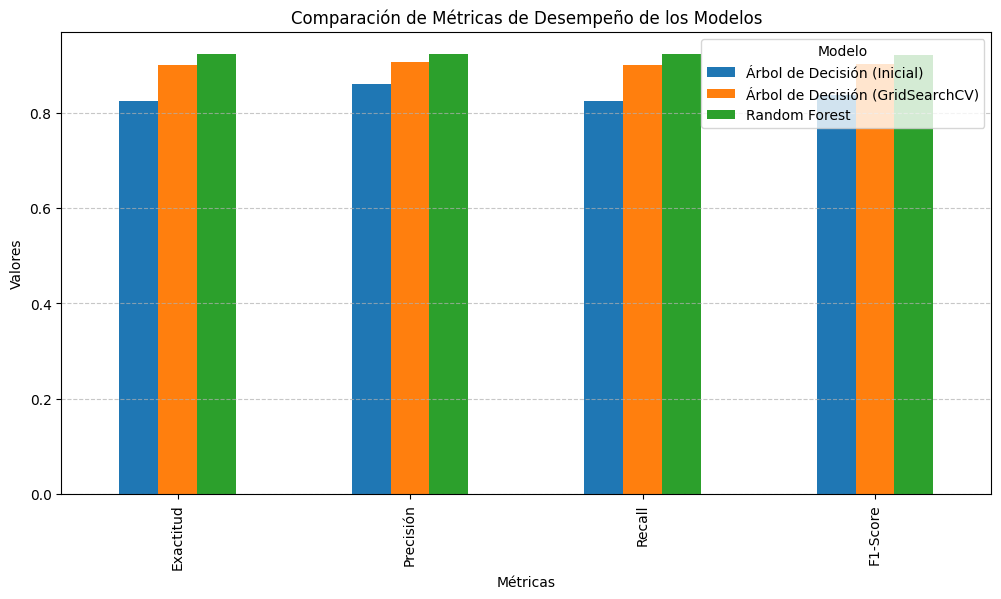

In [ ]:
# Gráfico usando la variable 'results_df' que ya contiene las métricas

# Transponer el DataFrame para la gráfica
df_metrics_transpuesto = results_df.set_index("Modelo").T

# Gráfico de barras
df_metrics_transpuesto.plot(kind="bar", figsize=(12, 6))
plt.title("Comparación de Métricas de Desempeño de los Modelos")
plt.xlabel("Métricas")
plt.ylabel("Valores")
plt.legend(title="Modelo")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
!pip install dtreeviz

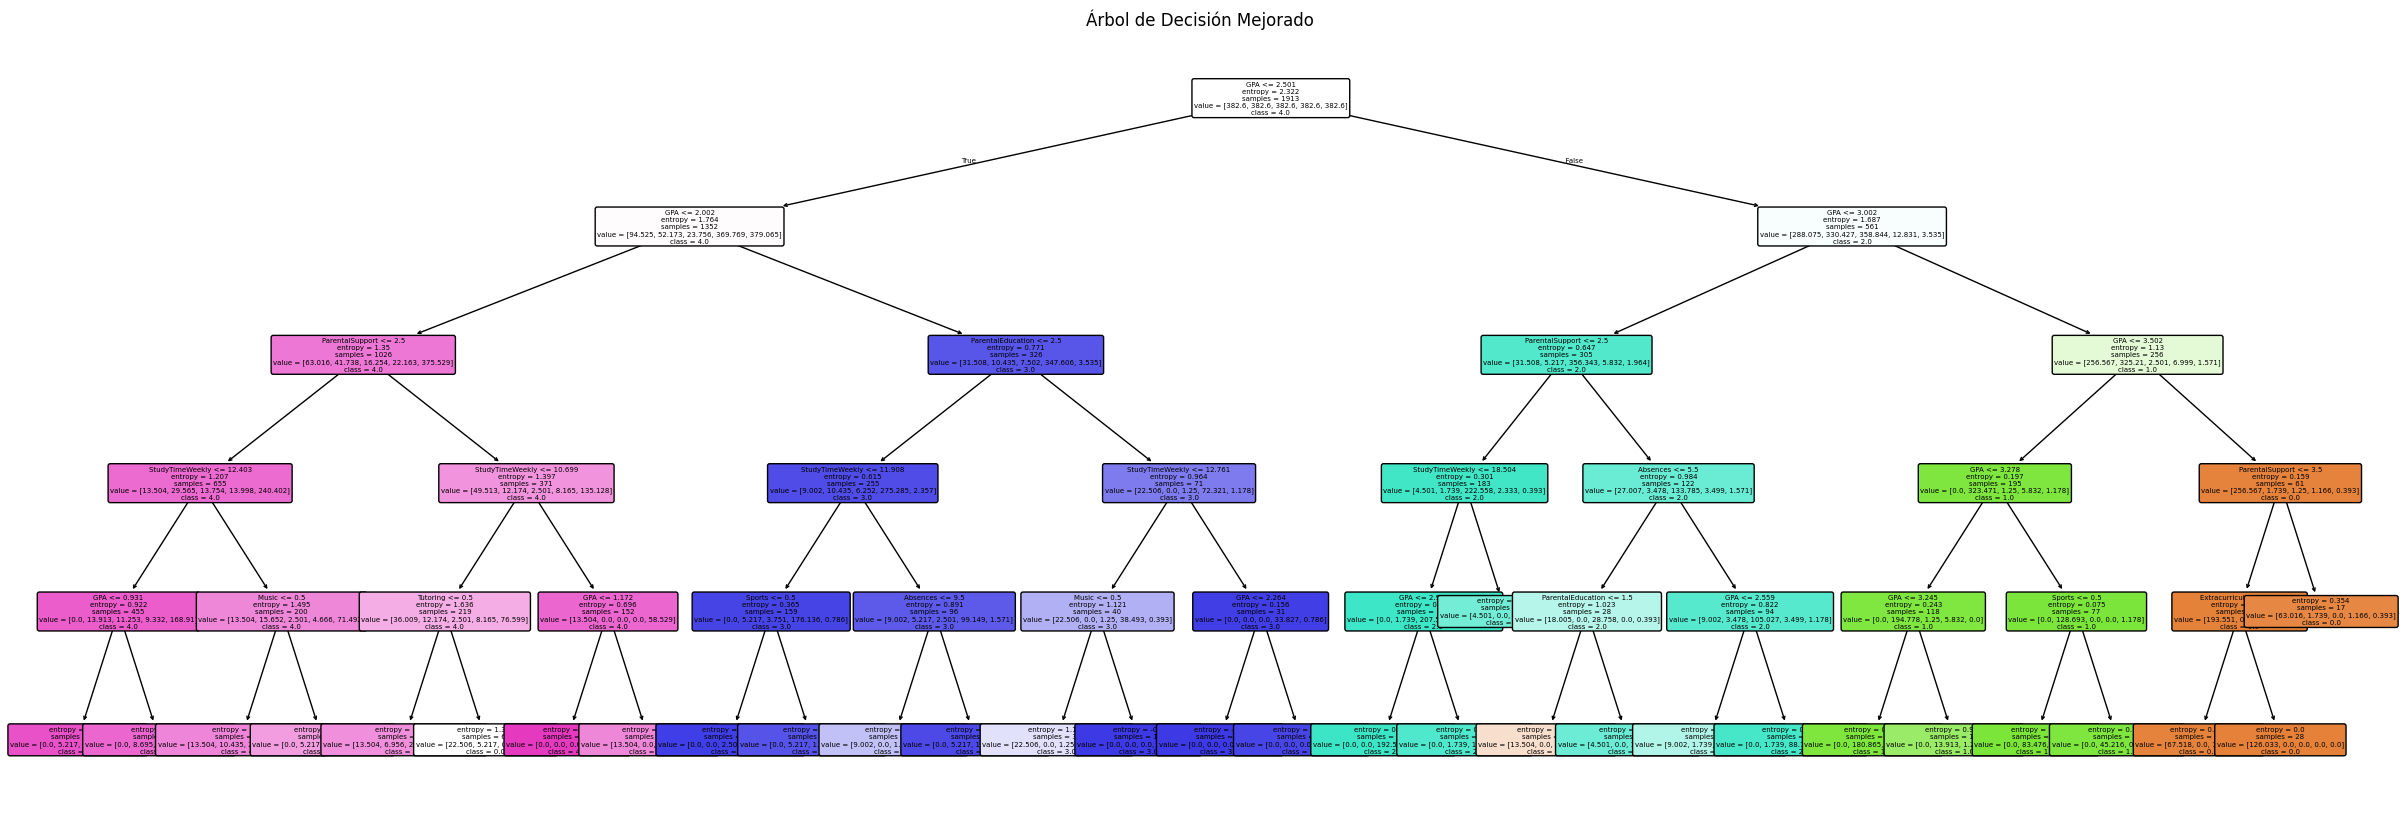

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Graficar el árbol de decisión mejorado directamente
plt.figure(figsize=(30, 10))  # Ajustar tamaño del gráfico
plot_tree(
    best_dt_model,
    feature_names=X_test.columns,  # Nombres de las características
    class_names=[str(cls) for cls in sorted(y_test.unique())],  # Nombres de las clases
    filled=True,  # Nodos rellenos con colores
    rounded=True,  # Bordes redondeados
    fontsize=5  # Tamaño de la fuente
)
plt.title("Árbol de Decisión Mejorado")  # Título del gráfico
plt.show()


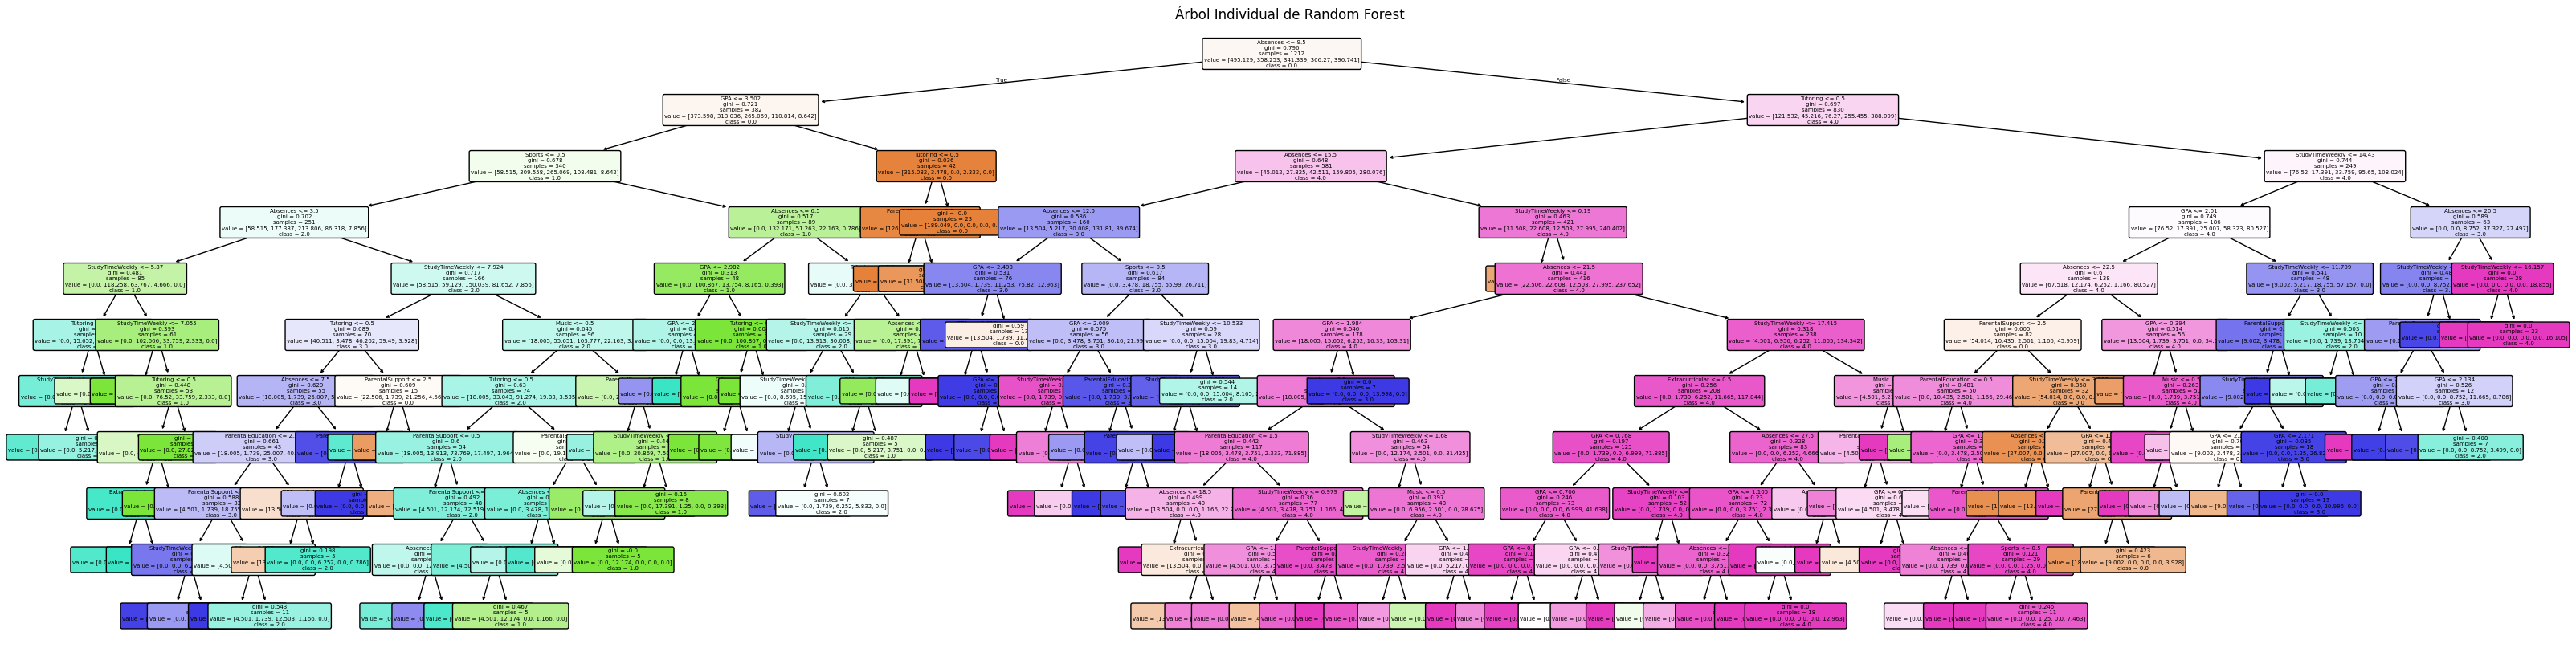

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Elegir un árbol individual del modelo Random Forest
random_forest_tree = random_forest.estimators_[0]  # Selecciona el primer árbol del conjunto

# Graficar el árbol seleccionado
plt.figure(figsize=(40, 10))
plot_tree(
    random_forest_tree,
    feature_names=X_test.columns,  # Nombres de las características
    class_names=[str(cls) for cls in sorted(y_test.unique())],  # Nombres de las clases
    filled=True,
    rounded=True,
    fontsize=5
)
plt.title("Árbol Individual de Random Forest")
plt.show()
